In [1]:
import pandas  as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Dense

In [2]:
df = pd.read_csv('bankloan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [5]:
df = df.dropna()


In [7]:
df.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [8]:
df = df.drop('Loan_ID', axis = 1)

In [9]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
#convert into dollars
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)

In [11]:
Counter(df['Loan_Status'])

Counter({'Y': 332, 'N': 148})

In [14]:
pre_y = df['Loan_Status']
pre_X = df.drop('Loan_Status', axis=1)


dm_x = pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(Y=1,N=0))

dm_x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,False,True,False,True,True,False,True,False,True,False,False
2,0.0,3000,0.0,66000,360.0,1.0,False,True,False,True,True,False,False,True,False,False,True
3,0.0,2583,2358.0,120000,360.0,1.0,False,True,False,True,False,True,True,False,False,False,True
4,0.0,6000,0.0,141000,360.0,1.0,False,True,True,False,True,False,True,False,False,False,True
5,2.0,5417,4196.0,267000,360.0,1.0,False,True,False,True,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71000,360.0,1.0,True,False,True,False,True,False,True,False,True,False,False
610,3.0,4106,0.0,40000,180.0,1.0,False,True,False,True,True,False,True,False,True,False,False
611,1.0,8072,240.0,253000,360.0,1.0,False,True,False,True,True,False,True,False,False,False,True
612,2.0,7583,0.0,187000,360.0,1.0,False,True,False,True,True,False,True,False,False,False,True


In [19]:
# used to balance the target values
smote = SMOTE(sampling_strategy='minority')
X1, y = smote.fit_resample(dm_x,dm_y)
#scale the features
sc= MinMaxScaler()
X = sc.fit_transform(X1)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 42, shuffle=True)

In [34]:

from tensorflow.keras.models import Sequential
classifier = Sequential()

classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal', input_dim =X_test.shape[1]))
classifier.add(Dense(800, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train,y_train, batch_size= 20, epochs= 100, verbose = 0)
eval_model = classifier.evaluate(X_train,y_train)
eval_model


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9061 - loss: 0.1772  


[0.16986164450645447, 0.9209039807319641]

In [35]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.52)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/stepWARNING:tensorflow:5 out of the last 21 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7500a4775120> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[Text(0, 0.5, 'NO'), Text(0, 1.5, 'Yes')]

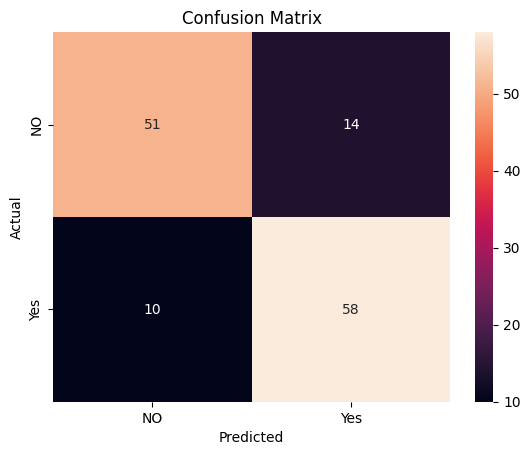

In [36]:
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()

sns.heatmap(cm, annot=True, ax= ax)

ax.set_xlabel ('Predicted')
ax.set_ylabel ('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["NO","Yes"])
ax.yaxis.set_ticklabels(['NO','Yes'])

- when input  yes actual predicted yes 66 times 
- when input No actual predicted No 44 times 
- when input yes it predicted no 21 times
- when input No it predicted yes 2 times